In [1]:
# In this notebook, I will be using Convolutional Neural Network(CNN) to classify CIFAR images(https://www.cs.toronto.edu/~kriz/cifar.html)

# I will be using the Keras Sequential API (https://www.tensorflow.org/guide/keras)

In [2]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Data
# The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.
# The dataset is divided into 50,000 training images and 10,000 testing images.
# The classes are mutually exclusive and there is no overlap between them.

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Verify the normalization
print(train_images.min(), train_images.max())  # Output should be 0.0 1.0
print(test_images.min(), test_images.max())    # Output should be 0.0 1.0

0.0 1.0
0.0 1.0


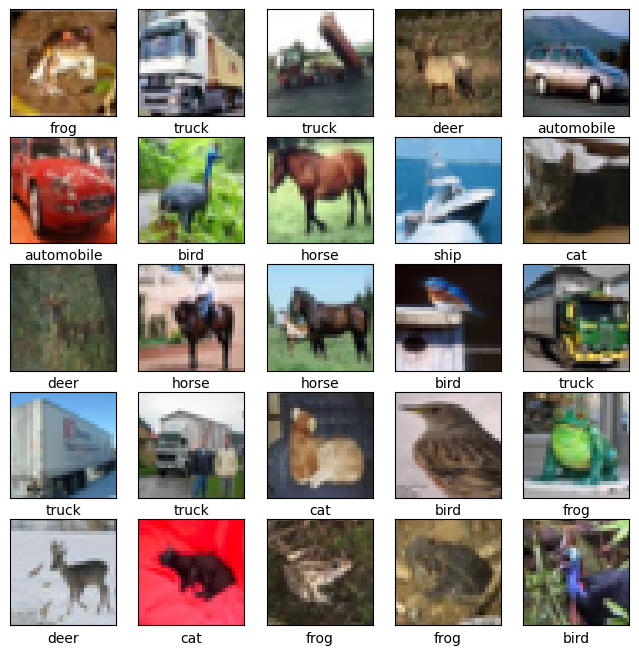

In [6]:
# To verify if the dataset looks correct, let's plot the first 25 images from the training set and display the
# class name below each image

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
# Create the convolutional base
# The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
# As input, a CNN takes tensors of shape (image_height, image_width, color_channels),
# ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B).
# In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.
# You can do this by passing the argument input_shape to our first layer.

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [8]:
# Now lets display the architecture of our model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Above, we can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape
# (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network.
# The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64).

In [10]:
# Adding dense layers on the top
# To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64))
# into one or more Dense layers to perform classification.
# Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.
# First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top.
# CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.



In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
# Here is the complete architecture of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# So our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

In [14]:
# Compile and train the model
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# An epoch means training the neural network with all the training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.3487 - loss: 1.7720 - val_accuracy: 0.5445 - val_loss: 1.2578
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5755 - loss: 1.2083 - val_accuracy: 0.6208 - val_loss: 1.0763
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6395 - loss: 1.0192 - val_accuracy: 0.6304 - val_loss: 1.0461
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6797 - loss: 0.9110 - val_accuracy: 0.6799 - val_loss: 0.9221
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7112 - loss: 0.8318 - val_accuracy: 0.6847 - val_loss: 0.9100
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7320 - loss: 0.7643 - val_accuracy: 0.6811 - val_loss: 0.9156
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7521 - loss: 0.7038 - val_accuracy: 0.6914 - val_loss: 0.9130
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7638 -

In [20]:
# adjusting the learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# An epoch means training the neural network with all the training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8035 - loss: 0.5559 - val_accuracy: 0.7067 - val_loss: 0.9042
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8164 - loss: 0.5160 - val_accuracy: 0.7076 - val_loss: 0.9240
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8258 - loss: 0.4949 - val_accuracy: 0.6883 - val_loss: 1.0292
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8356 - loss: 0.4599 - val_accuracy: 0.7083 - val_loss: 0.9545
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8451 - loss: 0.4369 - val_accuracy: 0.7032 - val_loss: 0.9779
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8550 - loss: 0.4110 - val_accuracy: 0.7013 - val_loss: 1.0359
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8621 - loss: 0.3868 - val_accuracy: 0.7056 - val_loss: 1.0603
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8712 -

313/313 - 2s - 7ms/step - accuracy: 0.6965 - loss: 1.1671


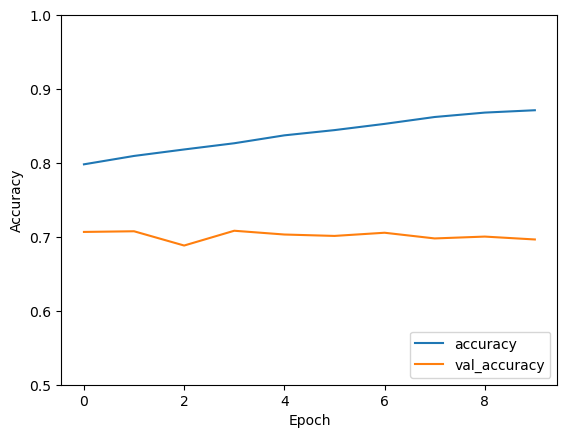

In [21]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)



In [22]:
print('Test Accuracy is', test_acc)

Test Accuracy is 0.6965000033378601


In [ ]:
# This simple CNN has achieved a test accuracy of over 70%, which is not bad.

In [23]:
# Data Augmentation
# Enhancing the training dataset by applying random transformations can help the model generalize better.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True)
datagen.fit(train_images)

In [24]:
# Model Architecture: Adding more layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Adding Dropout layer
model.add(layers.Dense(10, activation='softmax'))

In [25]:
# Optimizer and learning rate
# Experimenting with different optimizers and learning rates
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# An epoch means training the neural network with all the training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.3361 - loss: 1.7867 - val_accuracy: 0.5656 - val_loss: 1.2276
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5743 - loss: 1.1938 - val_accuracy: 0.6077 - val_loss: 1.0945
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6434 - loss: 1.0042 - val_accuracy: 0.6758 - val_loss: 0.9324
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6873 - loss: 0.8870 - val_accuracy: 0.6728 - val_loss: 0.9349
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7268 - loss: 0.7933 - val_accuracy: 0.7209 - val_loss: 0.8095
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7440 - loss: 0.7242 - val_accuracy: 0.7194 - val_loss: 0.8083
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7626 - loss: 0.6783 - val_accuracy: 0.7243 - val_loss: 0.8330
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7720 -

In [32]:
#  Fine-tuning Pretrained Models
# Using pretrained models and fine-tuning them for specific task can significantly boost performance.
# Models like VGG16, ResNet, or Inception can be used for this purpose.

from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.4308 - loss: 1.6092 - val_accuracy: 0.5484 - val_loss: 1.2788
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.5563 - loss: 1.2682 - val_accuracy: 0.5760 - val_loss: 1.1998
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.5759 - loss: 1.2062 - val_accuracy: 0.5824 - val_loss: 1.1765
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.5876 - loss: 1.1722 - val_accuracy: 0.5911 - val_loss: 1.1619
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.5987 - loss: 1.1396 - val_accuracy: 0.5974 - val_loss: 1.1339
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.6086 - loss: 1.1109 - val_accuracy: 0.6021 - val_loss: 1.1388
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6136 - loss: 1.1011 - val_accuracy: 0.6096 - val_loss: 1.1137
Epoch 8/10
1563/1

In [31]:
# Learning Rate Schedulers
# Using learning rate schedulers can adjust the learning rate during training, which can lead to better performance.


from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), callbacks=[reduce_lr])


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.0957 - loss: 2.3729 - val_accuracy: 0.1000 - val_loss: 2.3703 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.0991 - loss: 2.3698 - val_accuracy: 0.1000 - val_loss: 2.3678 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.0986 - loss: 2.3673 - val_accuracy: 0.1000 - val_loss: 2.3653 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.0974 - loss: 2.3650 - val_accuracy: 0.1000 - val_loss: 2.3631 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.1015 - loss: 2.3626 - val_accuracy: 0.1000 - val_loss: 2.3610 - learning_rate: 0.0010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.1004 - loss: 2.3605 - val_accuracy: 0.1000 - val_loss: 2.3586 - learning_rate: 0.0010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accura

In [30]:
# Experimenting with different batch size and epochs
# Evaluate the model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# An epoch means training the neural network with all the training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=20, batch_size = 64,
                   validation_data=(test_images, test_labels))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.0983 - loss: 2.4289 - val_accuracy: 0.1000 - val_loss: 2.4258
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.1018 - loss: 2.4248 - val_accuracy: 0.1000 - val_loss: 2.4220
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.0977 - loss: 2.4212 - val_accuracy: 0.1000 - val_loss: 2.4184
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.1010 - loss: 2.4176 - val_accuracy: 0.1000 - val_loss: 2.4149
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.0960 - loss: 2.4141 - val_accuracy: 0.1000 - val_loss: 2.4115
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.0971 - loss: 2.4109 - val_accuracy: 0.1000 - val_loss: 2.4083
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.0995 - loss: 2.4076 - val_accuracy: 0.1000 - val_loss: 2.4053
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.0968 - loss: 2.4047 - 

In [26]:
# Regularization
model.add(layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))


In [27]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# An epoch means training the neural network with all the training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.1661 - loss: 5.5406 - val_accuracy: 0.1000 - val_loss: 3.7730
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.0997 - loss: 3.4267 - val_accuracy: 0.1000 - val_loss: 2.7824
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.1008 - loss: 2.7037 - val_accuracy: 0.1000 - val_loss: 2.5608
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.0988 - loss: 2.5405 - val_accuracy: 0.1000 - val_loss: 2.4993
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.0979 - loss: 2.4918 - val_accuracy: 0.1000 - val_loss: 2.4740
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.1020 - loss: 2.4702 - val_accuracy: 0.1000 - val_loss: 2.4600
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.0971 - loss: 2.4575 - val_accuracy: 0.1000 - val_loss: 2.4503
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1018 -

313/313 - 3s - 9ms/step - accuracy: 0.1000 - loss: 2.4298


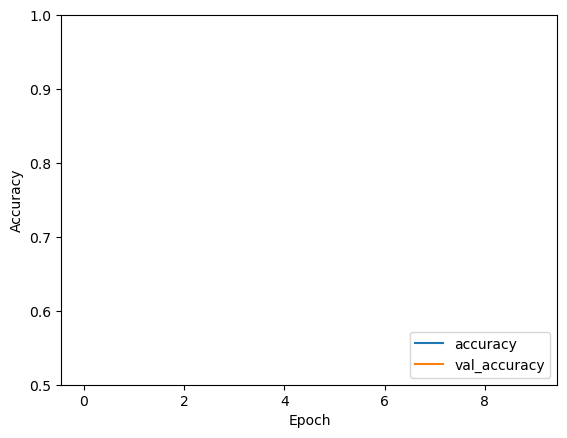

In [28]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)